In [27]:
%matplotlib inline
from scipy.optimize import dual_annealing
import numpy as np
import scipy.stats as scs
from matplotlib import pyplot as plt
from sklearn.gaussian_process.kernels import Matern
from collections import Counter
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from tqdm import tqdm
from datetime import datetime
import itertools
from itertools import permutations
from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.colors as mcolors
from sklearn import metrics
import pickle

### Model for the whole UK - Gamma

In [28]:
### load gamma
model_version = 1
target_distribution = "gamma_hurdle"
base_nn = "HConvLSTM_tdscale" #(Keep this fixed)

# Run this to get the prediction data in a variable named city_data
# Getting data
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"Checkpoints/uk_rain_DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))
print([path_,ckpt_path])
scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output_2014_2019-07.pkl"),"rb") )
#########

['Checkpoints/uk_rain_DGLM_HConvLSTM_tdscale_gamma_hurdle/lightning_logs/version_1/', 'Checkpoints/uk_rain_DGLM_HConvLSTM_tdscale_gamma_hurdle/lightning_logs/version_1/checkpoints/epoch=11-step=22556-val_loss_loss=-0.349-val_metric_mse_rain=22.651.ckpt']


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
# create list of locations
loc_lat_lon = ['lat_57.75_56.15_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-3.35_-1.75', 'lat_53.75_52.15_lon_-2.95_-1.35', 'lat_55.75_54.15_lon_-5.35_-3.75', 'lat_55.75_54.15_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-0.95_0.65', 'lat_52.95_51.35_lon_-10.95_-9.35', 'lat_54.95_53.35_lon_-9.75_-8.15', 'lat_54.95_53.35_lon_-9.35_-7.75', 'lat_51.75_50.15_lon_-4.95_-3.35', 'lat_51.75_50.15_lon_-4.55_-2.95', 'lat_54.55_52.95_lon_-5.75_-4.15', 'lat_54.55_52.95_lon_-5.35_-3.75', 'lat_51.35_49.75_lon_-0.55_1.05', 'lat_51.35_49.75_lon_-0.15_1.45', 'lat_54.15_52.55_lon_-2.55_-0.95', 'lat_54.15_52.55_lon_-2.15_-0.55', 'lat_57.35_55.75_lon_-3.75_-2.15', 'lat_57.35_55.75_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-10.95_-9.35', 'lat_53.35_51.75_lon_-10.55_-8.95', 'lat_55.35_53.75_lon_-10.95_-9.35', 'lat_55.35_53.75_lon_-10.55_-8.95', 'lat_52.95_51.35_lon_-8.55_-6.95', 'lat_52.95_51.35_lon_-8.15_-6.55', 'lat_54.95_53.35_lon_-6.95_-5.35', 'lat_54.95_53.35_lon_-6.55_-4.95', 'lat_51.75_50.15_lon_-2.15_-0.55', 'lat_51.75_50.15_lon_-1.75_-0.15', 'lat_54.15_52.55_lon_-9.35_-7.75', 'lat_54.15_52.55_lon_-8.95_-7.35', 'lat_57.75_56.15_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-2.55_-0.95', 'lat_55.75_54.15_lon_-4.55_-2.95', 'lat_52.95_51.35_lon_-10.55_-8.95', 'lat_54.95_53.35_lon_-8.95_-7.35', 'lat_51.75_50.15_lon_-4.15_-2.55', 'lat_54.55_52.95_lon_-4.95_-3.35', 'lat_51.35_49.75_lon_0.25_1.85', 'lat_54.15_52.55_lon_-1.75_-0.15', 'lat_56.95_55.35_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-10.15_-8.55', 'lat_55.35_53.75_lon_-10.15_-8.55', 'lat_52.95_51.35_lon_-7.75_-6.15', 'lat_54.95_53.35_lon_-6.15_-4.55', 'lat_51.75_50.15_lon_-1.35_0.25', 'lat_54.15_52.55_lon_-8.55_-6.95', 'lat_57.35_55.75_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-2.15_-0.55', 'lat_55.75_54.15_lon_-4.15_-2.55', 'lat_52.95_51.35_lon_-10.15_-8.55', 'lat_54.95_53.35_lon_-8.55_-6.95', 'lat_51.75_50.15_lon_-3.75_-2.15', 'lat_54.55_52.95_lon_-4.55_-2.95', 'lat_51.35_49.75_lon_0.65_2.25', 'lat_54.15_52.55_lon_-1.35_0.25', 'lat_56.95_55.35_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-9.75_-8.15', 'lat_55.35_53.75_lon_-9.75_-8.15', 'lat_52.95_51.35_lon_-7.35_-5.75', 'lat_54.95_53.35_lon_-5.75_-4.15', 'lat_51.75_50.15_lon_-0.95_0.65', 'lat_54.15_52.55_lon_-8.15_-6.55', 'lat_57.35_55.75_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-1.75_-0.15', 'lat_55.75_54.15_lon_-3.75_-2.15', 'lat_52.95_51.35_lon_-9.75_-8.15', 'lat_54.95_53.35_lon_-8.15_-6.55', 'lat_51.75_50.15_lon_-3.35_-1.75', 'lat_54.55_52.95_lon_-4.15_-2.55', 'lat_51.35_49.75_lon_1.05_2.65', 'lat_54.15_52.55_lon_-0.95_0.65', 'lat_56.95_55.35_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-9.35_-7.75', 'lat_55.35_53.75_lon_-9.35_-7.75', 'lat_52.95_51.35_lon_-6.95_-5.35', 'lat_54.95_53.35_lon_-5.35_-3.75', 'lat_51.75_50.15_lon_-0.55_1.05', 'lat_54.15_52.55_lon_-7.75_-6.15', 'lat_57.35_55.75_lon_-4.95_-3.35', 'lat_53.75_52.15_lon_-1.35_0.25', 'lat_55.75_54.15_lon_-3.35_-1.75', 'lat_52.95_51.35_lon_-9.35_-7.75', 'lat_54.95_53.35_lon_-7.75_-6.15', 'lat_51.75_50.15_lon_-2.95_-1.35', 'lat_54.55_52.95_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-6.55_-4.95', 'lat_53.75_52.15_lon_-10.95_-9.35', 'lat_56.95_55.35_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-8.95_-7.35', 'lat_55.35_53.75_lon_-8.95_-7.35', 'lat_52.95_51.35_lon_-6.55_-4.95', 'lat_54.95_53.35_lon_-4.95_-3.35', 'lat_51.75_50.15_lon_-0.15_1.45', 'lat_54.15_52.55_lon_-7.35_-5.75', 'lat_57.35_55.75_lon_-4.55_-2.95', 'lat_53.75_52.15_lon_-0.95_0.65', 'lat_55.75_54.15_lon_-2.95_-1.35', 'lat_52.95_51.35_lon_-8.95_-7.35', 'lat_54.95_53.35_lon_-7.35_-5.75', 'lat_51.75_50.15_lon_-2.55_-0.95', 'lat_54.55_52.95_lon_-3.35_-1.75', 'lat_50.95_49.35_lon_-6.15_-4.55', 'lat_53.75_52.15_lon_-10.55_-8.95', 'lat_56.95_55.35_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-8.55_-6.95', 'lat_55.35_53.75_lon_-8.55_-6.95', 'lat_52.95_51.35_lon_-6.15_-4.55', 'lat_54.95_53.35_lon_-4.55_-2.95', 'lat_51.75_50.15_lon_0.25_1.85', 'lat_54.15_52.55_lon_-6.95_-5.35', 'lat_57.35_55.75_lon_-4.15_-2.55', 'lat_54.55_52.95_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-5.75_-4.15', 'lat_53.75_52.15_lon_-10.15_-8.55', 'lat_56.95_55.35_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-8.15_-6.55', 'lat_55.35_53.75_lon_-8.15_-6.55', 'lat_52.95_51.35_lon_-5.75_-4.15', 'lat_54.95_53.35_lon_-4.15_-2.55', 'lat_51.75_50.15_lon_0.65_2.25', 'lat_54.15_52.55_lon_-6.55_-4.95', 'lat_54.55_52.95_lon_-2.55_-0.95', 'lat_50.95_49.35_lon_-5.35_-3.75', 'lat_53.75_52.15_lon_-9.75_-8.15', 'lat_56.95_55.35_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-7.75_-6.15', 'lat_55.35_53.75_lon_-7.75_-6.15', 'lat_52.95_51.35_lon_-5.35_-3.75', 'lat_54.95_53.35_lon_-3.75_-2.15', 'lat_51.75_50.15_lon_1.05_2.65', 'lat_54.15_52.55_lon_-6.15_-4.55', 'lat_54.55_52.95_lon_-2.15_-0.55', 'lat_50.95_49.35_lon_-4.95_-3.35', 'lat_53.75_52.15_lon_-9.35_-7.75', 'lat_56.55_54.95_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-7.35_-5.75', 'lat_55.35_53.75_lon_-7.35_-5.75', 'lat_52.95_51.35_lon_-4.95_-3.35', 'lat_54.95_53.35_lon_-3.35_-1.75', 'lat_51.35_49.75_lon_-6.55_-4.95', 'lat_54.15_52.55_lon_-5.75_-4.15', 'lat_54.15_52.55_lon_-10.95_-9.35', 'lat_50.95_49.35_lon_-4.55_-2.95', 'lat_53.75_52.15_lon_-8.95_-7.35', 'lat_56.55_54.95_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-6.95_-5.35', 'lat_55.35_53.75_lon_-6.95_-5.35', 'lat_52.95_51.35_lon_-4.55_-2.95', 'lat_54.95_53.35_lon_-2.95_-1.35', 'lat_51.35_49.75_lon_-6.15_-4.55', 'lat_54.15_52.55_lon_-5.35_-3.75', 'lat_54.15_52.55_lon_-10.55_-8.95', 'lat_50.95_49.35_lon_-4.15_-2.55', 'lat_53.75_52.15_lon_-8.55_-6.95', 'lat_56.55_54.95_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-6.55_-4.95', 'lat_55.35_53.75_lon_-6.55_-4.95', 'lat_52.95_51.35_lon_-4.15_-2.55', 'lat_54.95_53.35_lon_-2.55_-0.95', 'lat_51.35_49.75_lon_-5.75_-4.15', 'lat_54.15_52.55_lon_-4.95_-3.35', 'lat_54.15_52.55_lon_-10.15_-8.55', 'lat_50.95_49.35_lon_-3.75_-2.15', 'lat_53.75_52.15_lon_-8.15_-6.55', 'lat_56.55_54.95_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-6.15_-4.55', 'lat_55.35_53.75_lon_-6.15_-4.55', 'lat_52.95_51.35_lon_-3.75_-2.15', 'lat_54.55_52.95_lon_-10.95_-9.35', 'lat_51.35_49.75_lon_-5.35_-3.75', 'lat_54.15_52.55_lon_-4.55_-2.95', 'lat_54.15_52.55_lon_-9.75_-8.15', 'lat_50.95_49.35_lon_-3.35_-1.75', 'lat_53.75_52.15_lon_-7.75_-6.15', 'lat_56.55_54.95_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-5.75_-4.15', 'lat_55.35_53.75_lon_-5.75_-4.15', 'lat_52.95_51.35_lon_-3.35_-1.75', 'lat_54.55_52.95_lon_-10.55_-8.95', 'lat_51.35_49.75_lon_-4.95_-3.35', 'lat_54.15_52.55_lon_-4.15_-2.55', 'lat_50.95_49.35_lon_-2.95_-1.35', 'lat_53.75_52.15_lon_-7.35_-5.75', 'lat_56.55_54.95_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-5.35_-3.75', 'lat_55.35_53.75_lon_-5.35_-3.75', 'lat_52.95_51.35_lon_-2.95_-1.35', 'lat_54.55_52.95_lon_-10.15_-8.55', 'lat_51.35_49.75_lon_-4.55_-2.95', 'lat_54.15_52.55_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-2.55_-0.95', 'lat_53.75_52.15_lon_-6.95_-5.35', 'lat_56.55_54.95_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-4.95_-3.35', 'lat_55.35_53.75_lon_-4.95_-3.35', 'lat_52.95_51.35_lon_-2.55_-0.95', 'lat_54.55_52.95_lon_-9.75_-8.15', 'lat_51.35_49.75_lon_-4.15_-2.55', 'lat_54.15_52.55_lon_-3.35_-1.75', 'lat_54.15_52.55_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-2.15_-0.55', 'lat_53.75_52.15_lon_-6.55_-4.95', 'lat_56.15_54.55_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-4.55_-2.95', 'lat_55.35_53.75_lon_-4.55_-2.95', 'lat_52.95_51.35_lon_-2.15_-0.55', 'lat_54.55_52.95_lon_-9.35_-7.75', 'lat_51.35_49.75_lon_-3.75_-2.15', 'lat_50.95_49.35_lon_-1.75_-0.15', 'lat_53.75_52.15_lon_-6.15_-4.55', 'lat_56.15_54.55_lon_-5.35_-3.75', 'lat_53.35_51.75_lon_-4.15_-2.55', 'lat_55.35_53.75_lon_-4.15_-2.55', 'lat_52.95_51.35_lon_-1.75_-0.15', 'lat_54.55_52.95_lon_-8.95_-7.35', 'lat_51.35_49.75_lon_-3.35_-1.75', 'lat_50.95_49.35_lon_-1.35_0.25', 'lat_53.75_52.15_lon_-5.75_-4.15', 'lat_56.15_54.55_lon_-4.95_-3.35', 'lat_53.35_51.75_lon_-3.75_-2.15', 'lat_55.35_53.75_lon_-3.75_-2.15', 'lat_52.95_51.35_lon_-1.35_0.25', 'lat_54.55_52.95_lon_-8.55_-6.95', 'lat_51.35_49.75_lon_-2.95_-1.35', 'lat_50.95_49.35_lon_-0.95_0.65', 'lat_53.75_52.15_lon_-5.35_-3.75', 'lat_56.15_54.55_lon_-4.55_-2.95', 'lat_53.35_51.75_lon_-3.35_-1.75', 'lat_55.35_53.75_lon_-3.35_-1.75', 'lat_52.95_51.35_lon_-0.95_0.65', 'lat_54.55_52.95_lon_-8.15_-6.55', 'lat_51.35_49.75_lon_-2.55_-0.95', 'lat_50.95_49.35_lon_-0.55_1.05', 'lat_53.75_52.15_lon_-4.95_-3.35', 'lat_56.15_54.55_lon_-4.15_-2.55', 'lat_53.35_51.75_lon_-2.95_-1.35', 'lat_55.35_53.75_lon_-2.95_-1.35', 'lat_51.75_50.15_lon_-6.55_-4.95', 'lat_54.55_52.95_lon_-7.75_-6.15', 'lat_51.35_49.75_lon_-2.15_-0.55', 'lat_50.95_49.35_lon_-0.15_1.45', 'lat_53.75_52.15_lon_-4.55_-2.95', 'lat_56.15_54.55_lon_-3.75_-2.15', 'lat_53.35_51.75_lon_-2.55_-0.95', 'lat_54.95_53.35_lon_-10.95_-9.35', 'lat_51.75_50.15_lon_-6.15_-4.55', 'lat_54.55_52.95_lon_-7.35_-5.75', 'lat_51.35_49.75_lon_-1.75_-0.15', 'lat_50.95_49.35_lon_0.25_1.85', 'lat_53.75_52.15_lon_-4.15_-2.55', 'lat_56.15_54.55_lon_-3.35_-1.75', 'lat_53.35_51.75_lon_-2.15_-0.55', 'lat_54.95_53.35_lon_-10.55_-8.95', 'lat_51.75_50.15_lon_-5.75_-4.15', 'lat_54.55_52.95_lon_-6.95_-5.35', 'lat_51.35_49.75_lon_-1.35_0.25', 'lat_50.95_49.35_lon_0.65_2.25', 'lat_53.75_52.15_lon_-3.75_-2.15', 'lat_55.75_54.15_lon_-5.75_-4.15', 'lat_53.35_51.75_lon_-1.75_-0.15', 'lat_54.95_53.35_lon_-10.15_-8.55', 'lat_51.75_50.15_lon_-5.35_-3.75', 'lat_54.55_52.95_lon_-6.55_-4.95', 'lat_51.35_49.75_lon_-0.95_0.65', 'lat_53.35_51.75_lon_-1.35_0.25', 'lat_54.55_52.95_lon_-6.15_-4.55']
output_keys = ['pred_mu', 'pred_disp', 'target_did_rain', 'target_rain_value', 'date', 'pred_p']
#  'pred_mu', 'pred_disp', 'target_did_rain', 'target_rain_value', 'date', 'pred_p'

The output is in tranches of 7 days. Therefore, I need to reshape them into a single list with each entry being a single day, and do that for each location.
We drop the key 'ixd_loc_in_region' as it gives no further information and replace it with latitude and longitude data for the corners of the 4 by 4 square.
The result 'gamma_output' is a list formated as: list[location][parameter][day]
Now each of these entries is a 4 by 4 grid of the parameter for the day surrounding the given location.


In [30]:
gamma_outputs = [[[],[],[],[],[],[]] for places in range(len(loc_lat_lon))] 
for location_idx in range(len(loc_lat_lon)):
    gamma_outputs[location_idx].append([float(loc_lat_lon[location_idx].split('_')[i]) for i in [1,2,4,5]])
    for output_idx in range(6):
        for week in range(286):
            for day in range(7):
                #check for date, as date is formatted differently from the rest.
                if output_idx==4:
                    if day==0:
                        gamma_outputs[location_idx][output_idx].append(np.array(test_output[loc_lat_lon[location_idx]][output_keys[output_idx]][week],dtype='datetime64[D]'))
                    else:
                        gamma_outputs[location_idx][output_idx].append('')                   
                else:
                    gamma_outputs[location_idx][output_idx].append(test_output[loc_lat_lon[location_idx]][output_keys[output_idx]][week][day])


In [5]:
#inspecting parameter values
'''plt.figure(figsize=(18,5))
plt.scatter(gamma_outputs[0][4],[gamma_outputs[0][0][i][0][0] for i in range(2002)])
plt.title('Mu')

plt.figure(figsize=(18,5))
plt.scatter(gamma_outputs[0][4],[gamma_outputs[0][1][i][0][0] for i in range(2002)])
plt.title('Phi')

plt.figure(figsize=(18,5))
plt.scatter(gamma_outputs[0][4],[gamma_outputs[0][3][i][0][0] for i in range(2002)])
plt.title('Observed Rain')

plt.figure(figsize=(18,5))
plt.scatter(gamma_outputs[0][4],[gamma_outputs[0][5][i][0][0] for i in range(2002)])
plt.title('P')'''




"plt.figure(figsize=(18,5))\nplt.scatter(gamma_outputs[0][4],[gamma_outputs[0][0][i][0][0] for i in range(2002)])\nplt.title('Mu')\n\nplt.figure(figsize=(18,5))\nplt.scatter(gamma_outputs[0][4],[gamma_outputs[0][1][i][0][0] for i in range(2002)])\nplt.title('Phi')\n\nplt.figure(figsize=(18,5))\nplt.scatter(gamma_outputs[0][4],[gamma_outputs[0][3][i][0][0] for i in range(2002)])\nplt.title('Observed Rain')\n\nplt.figure(figsize=(18,5))\nplt.scatter(gamma_outputs[0][4],[gamma_outputs[0][5][i][0][0] for i in range(2002)])\nplt.title('P')"

Setting up the map.

In [57]:
m = Basemap(projection='mill',
            resolution='i',llcrnrlat = 48,
            llcrnrlon = -12,
            urcrnrlat = 58,
            urcrnrlon = 3)
            
maped_loc = [[[],[],[],[]] for i in range(267)]
for i in range(267):
    maped_loc[i][0] = m(3,gamma_outputs[i][6][0])[1]
    maped_loc[i][1] = m(3,gamma_outputs[i][6][1])[1]
    maped_loc[i][2] = m(gamma_outputs[i][6][2],3)[0]
    maped_loc[i][3] = m(gamma_outputs[i][6][3],3)[0]

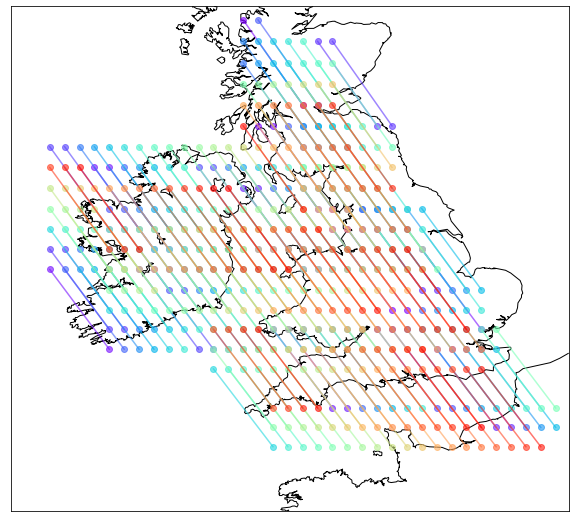

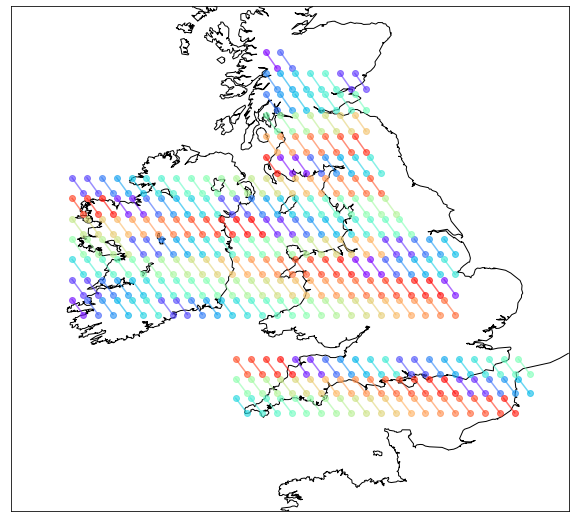

In [58]:

#locations on map
fig = plt.gcf()
fig.set_size_inches(10, 20)
dpi=300

m.drawcoastlines()   
   
'''for i in range(4):
    m.scatter(maped_loc[i][2],maped_loc[i][0],color='red')
    m.scatter(maped_loc[i][2],maped_loc[i][1],color='green')
    m.scatter(maped_loc[i][3],maped_loc[i][0],color='blue')
    m.scatter(maped_loc[i][3],maped_loc[i][1],color='orange')
'''

#ax = plt.gca()
#rect = matplotlib.patches.Rectangle((maped_loc[0][0],maped_loc[0][2]),maped_loc[0][3]-maped_loc[0][2],maped_loc[0][1]-maped_loc[0][0],facecolor='red',fill=True)
#ax.add_patch(rect)
color = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, 267))
for i in range(267):
    m.plot(x=[maped_loc[i][2],maped_loc[i][3]], y=[maped_loc[i][0],maped_loc[i][1]], marker='o',color=color[i],alpha=0.6)
plt.show()

m = Basemap(projection='mill',
            resolution='i',llcrnrlat = 48,
            llcrnrlon = -12,
            urcrnrlat = 58,
            urcrnrlon = 3)
            
maped_loc = [[[],[],[],[]] for i in range(267)]
for i in range(267):
    maped_loc[i][0] = m(3,gamma_outputs[i][6][0]-0.6)[1]
    maped_loc[i][1] = m(3,gamma_outputs[i][6][1]+0.7)[1]
    maped_loc[i][2] = m(gamma_outputs[i][6][2]+0.6,3)[0]
    maped_loc[i][3] = m(gamma_outputs[i][6][3]-0.7,3)[0]

fig = plt.gcf()
fig.set_size_inches(10, 20)
dpi=300

m.drawcoastlines()   
   
'''for i in range(4):
    m.scatter(maped_loc[i][2],maped_loc[i][0],color='red')
    m.scatter(maped_loc[i][2],maped_loc[i][1],color='green')
    m.scatter(maped_loc[i][3],maped_loc[i][0],color='blue')
    m.scatter(maped_loc[i][3],maped_loc[i][1],color='orange')
'''

#ax = plt.gca()
#rect = matplotlib.patches.Rectangle((maped_loc[0][0],maped_loc[0][2]),maped_loc[0][3]-maped_loc[0][2],maped_loc[0][1]-maped_loc[0][0],facecolor='red',fill=True)
#ax.add_patch(rect)
color = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, 267))
for i in range(267):
    m.plot(x=[maped_loc[i][2],maped_loc[i][3]], y=[maped_loc[i][0],maped_loc[i][1]], marker='o',color=color[i],alpha=0.6)
plt.show()

Checking for overlap

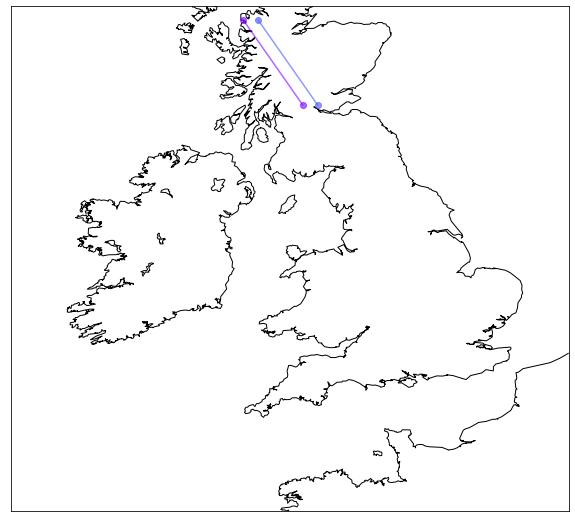

In [25]:
#locations on map
fig = plt.gcf()
fig.set_size_inches(10, 20)
dpi=300

m.drawcoastlines()   
   
'''for i in range(4):
    m.scatter(maped_loc[i][2],maped_loc[i][0],color='red')
    m.scatter(maped_loc[i][2],maped_loc[i][1],color='green')
    m.scatter(maped_loc[i][3],maped_loc[i][0],color='blue')
    m.scatter(maped_loc[i][3],maped_loc[i][1],color='orange')
'''

#ax = plt.gca()
#rect = matplotlib.patches.Rectangle((maped_loc[0][0],maped_loc[0][2]),maped_loc[0][3]-maped_loc[0][2],maped_loc[0][1]-maped_loc[0][0],facecolor='red',fill=True)
#ax.add_patch(rect)
color = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, 267))
for i in [0,31]:
    m.plot(x=[maped_loc[i][2],maped_loc[i][3]], y=[maped_loc[i][0],maped_loc[i][1]], marker='o',color=color[i],alpha=0.6)
plt.show()

In [31]:
# 0 and 31 have significant overlap. We check for the parMeter values at the same locations.
[gamma_outputs[0][3][20],gamma_outputs[31][3][20]]

[array([[ 9.099744,  9.001947,  9.099744,  9.397791],
        [ 9.099744,  9.500244,  9.798291,  9.798291],
        [ 9.695838, 10.003199, 10.301246, 10.701746],
        [10.003199, 10.096338, 11.102246, 12.098841]], dtype=float32),
 array([[ 9.299994 ,  9.602698 , 10.804199 , 11.69834  ],
        [10.599293 , 11.29784  , 11.69834  , 12.098841 ],
        [11.195386 , 12.201295 , 12.098841 , 12.396888 ],
        [12.098841 , 12.499341 , 13.0022955, 13.700843 ]], dtype=float32)]

In [48]:
#np.linspace(58.95,49.05,100) increments of 0.1
#np.linspace(-10.95,2.95,140) increments of 0.1
test_loc=[]
for loc in range(267):
    for i in range(4):
            test_loc.append(gamma_outputs[loc][6][i])

Seems the values are different. But if measurements are done at same location why are they different?

- ? Because locations are for a 16*16 grid.

### Getting the Gamma distribution and Us
We use the gamma marginal.

In [190]:
# ROC calculations
from sklearn.metrics import roc_curve, auc
from scipy.special import gamma
from math import exp
import numpy as np
import scipy.stats as scs

# Gamma: alpha = 1/disp, beta = alpha/mu
# 0 'pred_mu', 1'pred_disp', 2'target_did_rain', 3'target_rain_value', 4'date', 5'pred_p', 6'location'.

g_0mm=[]
g_0mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
            for row in range(4):
                for column in range(4):
                            
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>0.1:
                        g_0mm.append(1)
                    else:
                        g_0mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_0mm_cdfx.append(1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(0.1))))

print('0 done')

g_5mm=[]
g_5mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                                       
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>5:
                        g_5mm.append(1)
                    else:
                        g_5mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_5mm_cdfx.append( 1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(5))))
print('5 done')


g_10mm=[]
g_10mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>10:
                        g_10mm.append(1)
                    else:
                        g_10mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_10mm_cdfx.append(1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(10))))
print('10 done')


g_15mm=[]
g_15mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>15:
                        g_15mm.append(1)
                    else:
                        g_15mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_15mm_cdfx.append(1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(15))))
print('15 done')


g_20mm=[]
g_20mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>20:
                        g_20mm.append(1)
                    else:
                        g_20mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_20mm_cdfx.append(1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(20))))
print('20 done')


g_25mm=[]
g_25mm_cdfx=[]

for place in tqdm(gamma_outputs):
    for day in range(2002):
        for row in range(4):
                for column in range(4):
                    #vector of 'did it rain this much'
                    if place[3][day][row][column]>25:
                        g_25mm.append(1)
                    else:
                        g_25mm.append(0)
                    #vetor of 'probability it rained this much'
                    g_25mm_cdfx.append(1-((1-place[5][day][row][column])+(place[5][day][row][column]*scs.gamma(scale=place[1][day][row][column]*place[0][day][row][column],a=1/place[1][day][row][column]).cdf(25))))
print('25 done')


100%|██████████| 267/267 [1:09:37<00:00, 15.65s/it]


0 done


100%|██████████| 267/267 [1:09:56<00:00, 15.72s/it]


5 done


100%|██████████| 267/267 [1:09:54<00:00, 15.71s/it]


10 done


100%|██████████| 267/267 [1:09:37<00:00, 15.65s/it]


15 done


100%|██████████| 267/267 [1:09:38<00:00, 15.65s/it]


20 done


100%|██████████| 267/267 [1:09:48<00:00, 15.69s/it]

25 done


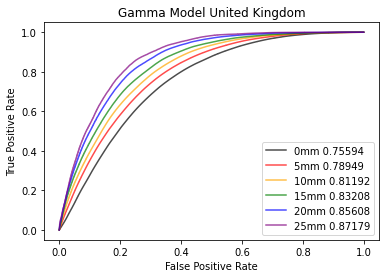

In [192]:
# ROC plot

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(g_0mm,g_0mm_cdfx)
auc0 = metrics.roc_auc_score(g_0mm,g_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(g_5mm,g_5mm_cdfx)
auc5 = metrics.roc_auc_score(g_5mm,g_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(g_10mm,g_10mm_cdfx)
auc10 = metrics.roc_auc_score(g_10mm,g_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(g_15mm,g_15mm_cdfx)
auc15 = metrics.roc_auc_score(g_15mm,g_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(g_20mm,g_20mm_cdfx)
auc20 = metrics.roc_auc_score(g_20mm,g_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(g_25mm,g_25mm_cdfx)
auc25 = metrics.roc_auc_score(g_25mm,g_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Gamma Model United Kingdom')
plt.savefig('ROC Gamma model UK')

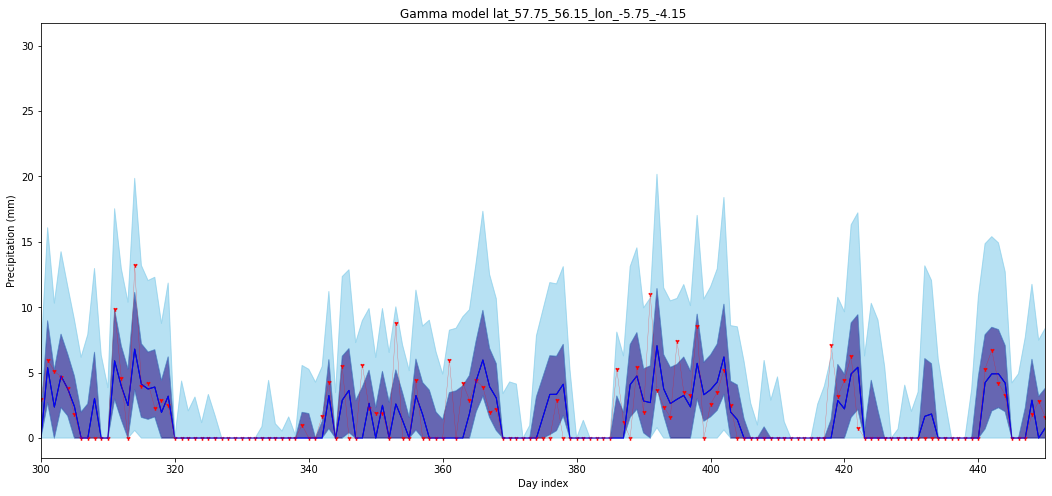

In [5]:
### plot quantiles

# Median and 68, 95 percentiles for Cardiff
import math 
import scipy.stats as scs 
import matplotlib.pyplot as plt

g_median = []
g_q25 = []
g_q75 = []
g_q68 = []
g_q95 = []
g_q32 = []
g_q05 = []

#Here:
# 0 'pred_mu', 1'pred_disp', 2'target_did_rain', 3'target_rain_value', 4'date', 5'pred_p', 6'location'.
#[place][parameter][day][row][column]
#Old:
#0:i,1:location,2:pred_mu,3:pred_disp,4:pred_p,5:target_rain_value,6:dates
for m,d,i in zip([gamma_outputs[1][0][i][0][0] for i in range(2002)],[gamma_outputs[1][1][i][0][0] for i in range(2002)],range(2002)) :
    rv = scs.gamma(scale=m*d,a=1/d)  
      
    g_median.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.5)/gamma_outputs[1][5][i][0][0]))
    g_q25.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.25)/gamma_outputs[1][5][i][0][0]))
    g_q75.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.75)/gamma_outputs[1][5][i][0][0]))
    g_q68.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.68)/gamma_outputs[1][5][i][0][0]))
    g_q95.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.95)/gamma_outputs[1][5][i][0][0]))
    g_q32.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.32)/gamma_outputs[1][5][i][0][0]))
    g_q05.append(rv.ppf((gamma_outputs[1][5][i][0][0]-1+0.05)/gamma_outputs[1][5][i][0][0]))

for q in [g_median,g_q25,g_q05,g_q32,g_q68,g_q75,g_q95]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0
            
plt.figure(figsize=(18, 8))

plt.plot(range(2002),g_q05,color='skyblue',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),g_q25,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),g_median,color='blue',linewidth=1,alpha=1)
plt.plot(range(2002),g_q75,color='navy',linewidth=0.6,alpha=0.3)
plt.plot(range(2002),g_q95,color='skyblue',linewidth=0.6,alpha=0.3)
plt.fill_between(range(2002), g_median, g_q75, where=([g_median[k] < g_q75[k] for k in range(len(gamma_outputs[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), g_median, g_q25, where=([g_median[k] > g_q25[k] for k in range(len(gamma_outputs[1][5]))]), color='navy', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), g_q95, g_q75, where=([g_q95[k] > g_q75[k] for k in range(len(gamma_outputs[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.fill_between(range(2002), g_q05, g_q25, where=([g_q05[k] < g_q25[k] for k in range(len(gamma_outputs[1][5]))]), color='skyblue', alpha=0.6,interpolate=True)
plt.scatter(range(2002),[gamma_outputs[1][3][i][0][0] for i in range(2002)],color='r',marker='1',s=20)
plt.plot(range(2002),[gamma_outputs[1][3][i][0][0] for i in range(2002)],color='r',alpha=0.6,linewidth=0.3)
plt.xlim([range(2002)[300],range(2002)[450]])
plt.title('Gamma model lat_57.75_56.15_lon_-5.75_-4.15')
plt.xlabel('Day index')
plt.ylabel('Precipitation (mm)')
plt.savefig('Gamma_lat_57 75_56 15_lon_-5 75_-4 15')

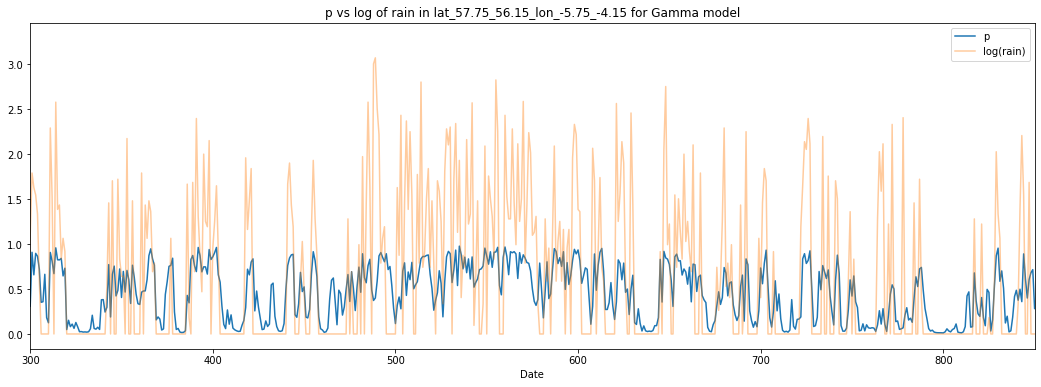

In [138]:
#p plot gamma
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(range(2002),[gamma_outputs[1][5][i][0][0] for i in range(2002)])
plt.plot(range(2002),[0 if rain<1 else np.log(rain) for rain in [gamma_outputs[1][3][i][0][0] for i in range(2002)]],'-',alpha=0.4)
plt.xlabel('Date')
plt.xlim([range(2002)[300],range(2002)[850]])
plt.legend(['p','log(rain)'],facecolor='white')
plt.title('p vs log of rain in lat_57.75_56.15_lon_-5.75_-4.15 for Gamma model')
plt.savefig('gamma_p_UK')


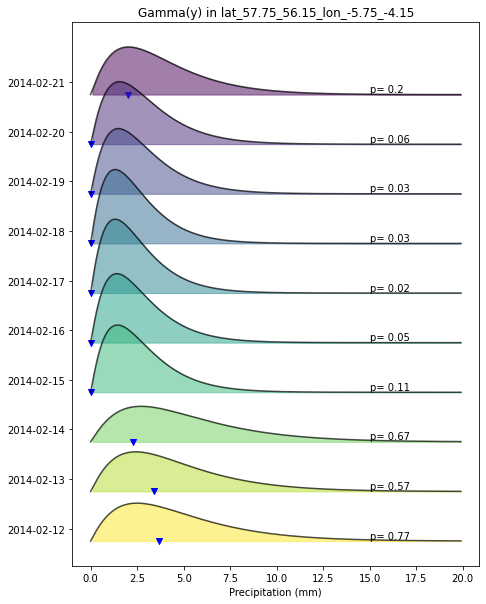

In [218]:
### densities plots
import matplotlib
import pandas as pd
import sklearn.preprocessing
x=[i/10 for i in range(200)]

plt.figure(figsize=(7.3, 10))
colors = matplotlib.cm.viridis(np.linspace(0, 1, len(range(959,969))))
for idx,col in zip(range(968,958,-1),colors):
    rv=scs.gamma(scale=[gamma_outputs[1][1][i][0][0] for i in range(2002)][idx]*[gamma_outputs[1][0][i][0][0] for i in range(2002)][idx],a=1/[gamma_outputs[1][1][i][0][0] for i in range(2002)][idx])
    level=((idx-300)*0.2)
    plt.plot(x,level+rv.pdf(x),color='black',alpha=0.7)
    plt.fill_between(x,y1=level+rv.pdf(x),y2=level,where=([level+rv.pdf(x_)>level for x_ in x]),color=col,alpha=0.5)
    plt.text(15,level+0.01,'p= '+str(round([gamma_outputs[1][5][i][0][0] for i in range(2002)][idx],2)))
    plt.scatter([gamma_outputs[1][3][i][0][0] for i in range(2002)][idx],level,marker='v',color='b')
plt.xlabel('Precipitation (mm)')
plt.yticks([131.85+0.2*k for k in range(10)],["2014-02-12",
"2014-02-13",
"2014-02-14",
"2014-02-15",
"2014-02-16",
"2014-02-17",
"2014-02-18",
"2014-02-19",
"2014-02-20",
"2014-02-21"])
plt.title('Gamma(y) in lat_57.75_56.15_lon_-5.75_-4.15')
plt.savefig('gamma_dists')

In [288]:
#Saving data
import pickle

with open('g_0mm.txt','wb') as f:
    pickle.dump(g_0mm,f)

with open('g_0mm_cdfx.txt','wb') as f:
    pickle.dump(g_0mm_cdfx,f)

with open('g_10mm.txt','wb') as f:
    pickle.dump(g_10mm,f)

with open('g_10mm_cdfx.txt','wb') as f:
    pickle.dump(g_10mm_cdfx,f)

with open('g_15mm.txt','wb') as f:
    pickle.dump(g_15mm,f)

with open('g_15mm_cdfx.txt','wb') as f:
    pickle.dump(g_15mm_cdfx,f)

with open('g_20mm.txt','wb') as f:
    pickle.dump(g_20mm,f)

with open('g_20mm_cdfx.txt','wb') as f:
    pickle.dump(g_20mm_cdfx,f)

with open('g_25mm.txt','wb') as f:
    pickle.dump(g_25mm,f)

with open('g_25mm_cdfx.txt','wb') as f:
    pickle.dump(g_25mm_cdfx,f)
